In [13]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# from ipywidgets import interact, IntSlider, FloatSlider, fixed
from astropy.modeling.models import Gaussian1D

import lightkurve as lk

# import seaborn as sns

# import echelle
from astropy.timeseries import LombScargle
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

from astropy.timeseries import LombScargle
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from astropy.convolution import convolve_fft
from astropy.stats import sigma_clip

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 17
plt.rcParams['axes.labelsize'] = 15
# plt.rcParams['savefig.transparent'] = False
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.edgecolor'] = 'white'

In [5]:
lc_echelle = lk.search_lightcurve('KIC 3347458',exptime=1800)#, author='Kepler',exptime=1800).download_all().stitch()
lc_echelle

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr003347458,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr003347458,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr003347458,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr003347458,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr003347458,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr003347458,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr003347458,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr003347458,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr003347458,0.0


In [24]:
# lc_echelle = lk.search_lightcurve('KIC 2158410', author='Kepler', exptime=1800)[0].download()#.download_all().stitch(
lc_echelle = lk.search_lightcurve('KIC 3347458', author='Kepler', exptime=1800).download_all().stitch()
# lc_echelle
lc_echelle_sap = lk.search_lightcurve('KIC 3347458', author='Kepler', exptime=1800).download_all(flux_column='sap_flux').stitch()
lc_echelle_sap = lc_echelle_sap.remove_nans()
lc_echelle

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,,,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.53912130781828,1.0001839e+00,2.5243302e-05,0,9.688878e-04,262.13541,845.36016,568,1.0729221e+06,2.7278606e+01,5.7407983e+03,1.9590918e+00,1.0789611e+06,2.7231533e+01,0,———,———,———,———,262.13541,2.3327933e-05,845.36016,3.8883765e-05,-4.5685451e-03,7.8702774e-03
120.55955592849205,1.0000287e+00,2.5159170e-05,10000000,9.699085e-04,262.13572,845.35990,569,1.0730172e+06,2.7279280e+01,5.7428169e+03,1.9538364e+00,1.0787938e+06,2.7140776e+01,10000000,———,———,———,———,262.13572,2.3330334e-05,845.35990,3.8879774e-05,-4.2234324e-03,7.2372993e-03
120.57999044910684,1.0001417e+00,2.5164431e-05,0,9.709291e-04,262.13613,845.36027,570,1.0731169e+06,2.7280231e+01,5.7390078e+03,1.9558476e+00,1.0789156e+06,2.7146450e+01,0,———,———,———,———,262.13613,2.3329554e-05,845.36027,3.8870759e-05,-3.6730696e-03,7.2712377e-03
120.60042516971589,1.0001247e+00,2.5202131e-05,0,9.719497e-04,262.13684,845.36015,571,1.0730810e+06,2.7279366e+01,5.7328057e+03,1.9523592e+00,1.0788972e+06,2.7187120e+01,0,———,———,———,———,262.13684,2.3329676e-05,845.36015,3.8864535e-05,-3.0407228e-03,7.3674782e-03
120.62085979033145,1.0002027e+00,2.5183366e-05,0,9.729703e-04,262.13736,845.36061,572,1.0730950e+06,2.7280897e+01,5.7366353e+03,1.9539900e+00,1.0789814e+06,2.7166878e+01,0,———,———,———,———,262.13736,2.3338087e-05,845.36061,3.8855684e-05,-2.4030439e-03,7.0138294e-03
120.64129431088804,1.0001472e+00,2.5217765e-05,10000000000000,9.739909e-04,262.13770,845.36067,573,1.0729854e+06,2.7278128e+01,5.7345547e+03,1.9529163e+00,1.0789216e+06,2.7203985e+01,10000000000000,———,———,———,———,262.13770,2.3337432e-05,845.36067,3.8849623e-05,-2.0480969e-03,7.5643635e-03
120.66172893137991,1.0002135e+00,2.5213934e-05,10000000000000,9.750114e-04,262.13795,845.36064,574,1.0729528e+06,2.7277935e+01,5.7297476e+03,1.9587672e+00,1.0789931e+06,2.7199854e+01,10000000000000,———,———,———,———,262.13795,2.3340372e-05,845.36064,3.8846232e-05,-1.7672664e-03,6.9812578e-03
120.68216365187982,1.0001589e+00,2.5216174e-05,0,9.760319e-04,262.13800,845.36083,575,1.0728048e+06,2.7276039e+01,5.7351396e+03,1.9552894e+00,1.0789341e+06,2.7202269e+01,0,———,———,———,———,262.13800,2.3343115e-05,845.36083,3.8851344e-05,-1.7196784e-03,7.0533641e-03


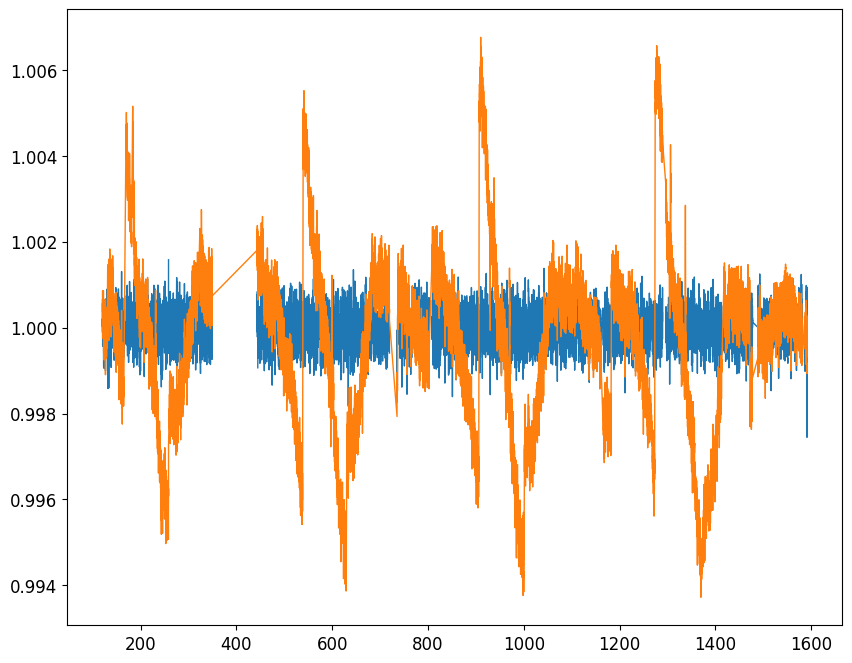

In [25]:
plt.plot(lc_echelle.time.value,lc_echelle.flux.value)
plt.plot(lc_echelle_sap.time.value,lc_echelle_sap.flux.value)
# plt.plot(lc_echelle.time.value,lc_echelle.sap_flux/np.max(lc_echelle.sap_flux))
# plt.plot(lc_echelle.time.value,lc_echelle.pdcsap_flux/np.max(lc_echelle.pdcsap_flux))
# plt.savefig('/Users/ccra8514/Desktop/pdc_sap_comparison')
plt.show()

In [77]:
def apply_highpassfilter(time, flux, width_days):
    cadence = np.median(np.diff(time))
    filter_width = width_days/cadence
#     print(filter_width)
    highlysmoothed_flux = convolve(flux, Gaussian1DKernel(filter_width),boundary='wrap')
    hpfiltered_flux = flux/highlysmoothed_flux
    return time, hpfiltered_flux

In [78]:
width_days = 11.574/(4) # 5 # 1
#     width_days = 1#.5
time = np.asarray(lc_echelle_sap.time.value)
flux = np.asarray(lc_echelle_sap.flux.value)
time, hpfiltered_flux = apply_highpassfilter(time,flux,
                                             width_days=width_days)
clipped_flux = sigma_clip(hpfiltered_flux, sigma=4, maxiters=1)
# if sigma_flag == True:
time = time[~clipped_flux.mask]
hpfiltered_flux = clipped_flux.data[~clipped_flux.mask]

hpfiltered_flux = (hpfiltered_flux-1)#*1e6 # convert from percent to ppm

# freq,amp = calc_lomb_scargle(time,hpfiltered_flux) # amp in ppm

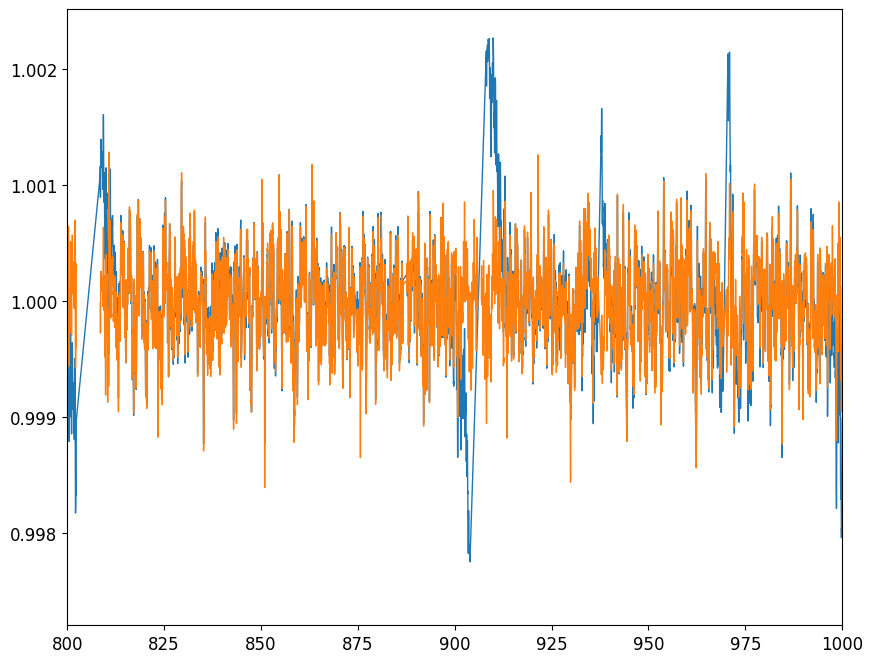

In [89]:
plt.plot(time,hpfiltered_flux+1)
plt.plot(lc_echelle.time.value,(lc_echelle.flux.value))
plt.xlim(800,1000)
plt.show()

In [80]:
freq_unfiltered, amp_unfiltered = calc_lomb_scargle(lc_echelle_sap.time.value,lc_echelle_sap.flux.value)
# freq = freq[freq<270]
# amp = amp[freq<270]
amp_unfiltered

array([118.05429027, 109.19231087, 105.28045296, ...,   1.4537064 ,
         1.10202271,   0.85320232])

In [81]:
freq, amp = calc_lomb_scargle(time,hpfiltered_flux)
# freq = freq[freq<270]
# amp = amp[freq<270]
amp

array([3.9737175 , 3.8404894 , 3.65818923, ..., 0.68540457, 0.64015667,
       0.55672328])

In [73]:
powerspec = pd.read_csv('../data/bgfitting_PSDs/KIC3347458_PS.csv')
jie_powerspec = pd.read_csv('../data/JieRawSpectra/3347458.ts.fft', delimiter='\s+', names=['freq','power'])

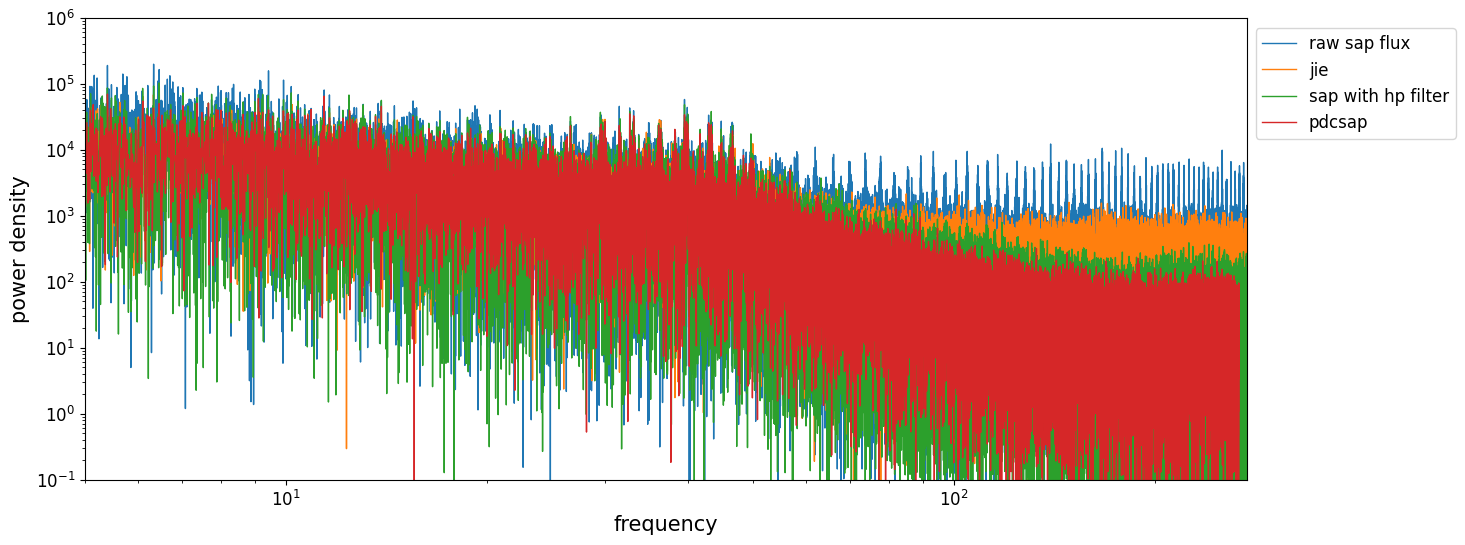

In [98]:
plt.figure(figsize=(15,6))
plt.plot(freq_unfiltered,amp_unfiltered**2*110,label='raw sap flux')
# plt.plot(freq,amp**2*110,label='new')
plt.plot(jie_powerspec['freq'],jie_powerspec['power'],label='jie')
plt.plot(freq,amp**2*110,label='sap with hp filter')
plt.plot(powerspec['freq'],powerspec['power'],label='pdcsap')
# plt.plot(freq,amp**2*110,label='new')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0.5,250)
plt.xlim(5,275)
plt.ylim(1e-1,1e6)
# plt.xlim(right=275)
plt.xlabel('frequency')
plt.ylabel('power density')
plt.legend(bbox_to_anchor=(1,0.72),loc='lower left')
plt.show()

# Creating your own PDCSAP

In [7]:
from lightkurve import search_lightcurve
from lightkurve.correctors import load_kepler_cbvs
# import numpy as np

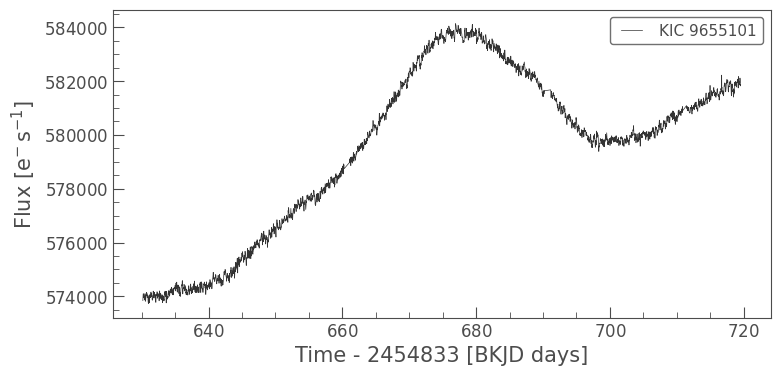

In [8]:
lc = search_lightcurve('KIC 9655101', quarter=7).download(flux_column='sap_flux') #quarter=14
lc.plot();

In [9]:
cbvs = load_kepler_cbvs(quarter=lc.quarter, channel=lc.channel, 
                        mission='Kepler')

In [10]:
cbvs[0:4]

time,CADENCENO,VECTOR_1,VECTOR_2,VECTOR_3,VECTOR_4,VECTOR_5,VECTOR_6,VECTOR_7,VECTOR_8,VECTOR_9,VECTOR_10,VECTOR_11,VECTOR_12,VECTOR_13,VECTOR_14,VECTOR_15,VECTOR_16,GAP
,,,,,,,,,,,,,,,,,,
Time,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
55462.67250542,25509,0.02542,-0.04335,-0.04712,0.09932,-0.10323,0.08156,0.00641,-0.00284,-0.01891,-0.02796,-0.00843,-0.03485,0.06911,-0.02898,-0.02128,-0.05777,1
55462.69293912,25510,0.02542,-0.04335,-0.04712,0.09932,-0.10323,0.08156,0.00641,-0.00284,-0.01891,-0.02796,-0.00843,-0.03485,0.06911,-0.02898,-0.02128,-0.05777,0
55462.71337272,25511,0.02522,-0.04252,-0.04226,0.09167,-0.09996,0.07334,0.00921,-0.00436,-0.01785,-0.03097,0.00495,-0.02789,0.06016,-0.02408,-0.01837,-0.05757,0
55462.73380642,25512,0.02497,-0.04137,-0.03709,0.08233,-0.09064,0.07000,0.00682,-0.00756,-0.02421,-0.02953,0.00422,-0.02609,0.06169,-0.02128,-0.01430,-0.04515,0


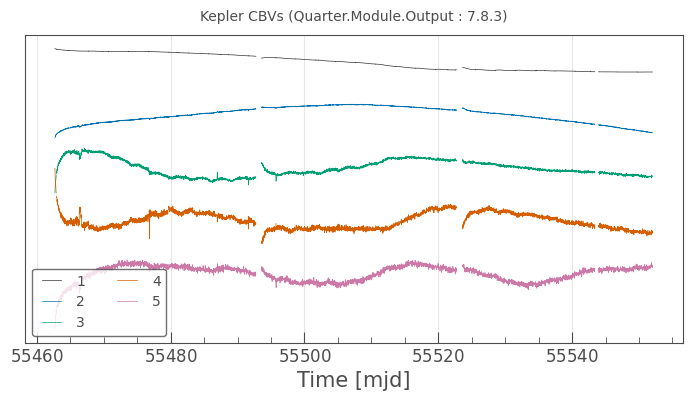

In [11]:
cbvs.plot(cbv_indices=np.arange(1,6));

In [10]:
def calc_lomb_scargle(t,y):
   oversample = 10
   tmax = t[-1]#t.max()
   tmin = t[0]#t.min()
   df = 1.0 / (tmax - tmin)
   fmin = df
   fmax = 600 # maximum frequency in cycles per day (c/d)
 
   freq = np.arange(fmin, fmax, df / oversample)
   model = LombScargle(t, y)
   sc = model.power(freq, method="fast", normalization="psd")
 
   fct = np.sqrt(4./len(t))
   amp = np.sqrt(sc) * fct
   return freq*11.574, amp*1E6 # return frequency in muHz and amplitude in ppm

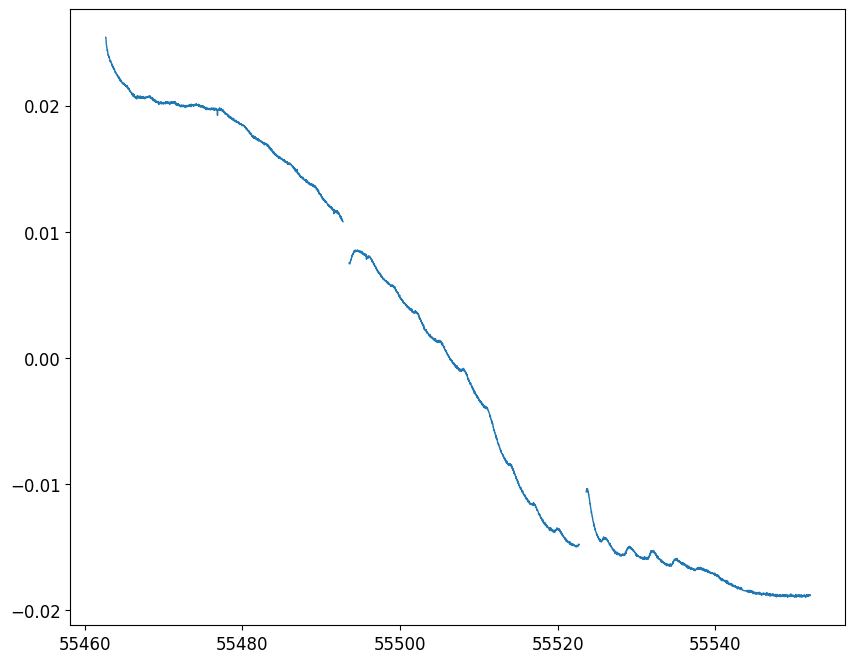

In [68]:
plt.plot(cbvs['time'].value.data,cbvs['VECTOR_1'])
plt.show()

In [72]:
freq, amp = calc_lomb_scargle(cbvs['time'].value.data,cbvs['VECTOR_1'])
amp

<Quantity [nan, nan, nan, ..., nan, nan, nan]>

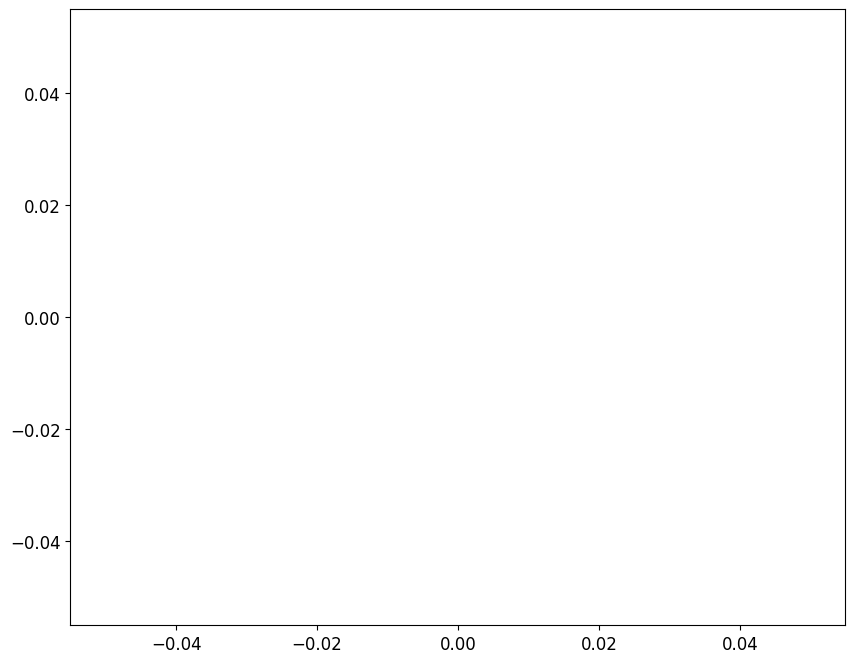

In [73]:
plt.plot(freq,amp)
plt.show()

In [12]:
# cbv_designmatrix = cbvs.to_designmatrix(cbv_indices=np.arange(1,6), name='10.1.1.SingleScale')
# cbv_designmatrix

In [13]:
# cbv_designmatrix.plot();

In [14]:
# # Take a cut of the LC loaded above
# lc_short = lc[501:1501]
# # Take a different cut of the CBVs
# cbvs_short = cbvs[0:1000]
# These cuts do not overlap
np.all(lc.cadenceno == cbvs.cadenceno)

False

In [15]:
# Align the cuts
cbvs_aligned = cbvs.align(lc)
# They now fully overlap
np.all(lc.cadenceno == cbvs_aligned.cadenceno)

True

In [16]:
# # Interpolate the CBVs to the FFI cadence times
# cbvs_interpolated = cbvs.interpolate(lc_short, extrapolate=False)
# # All cadence times agree
# np.all(lc_short.time.value == cbvs_interpolated.time.value)

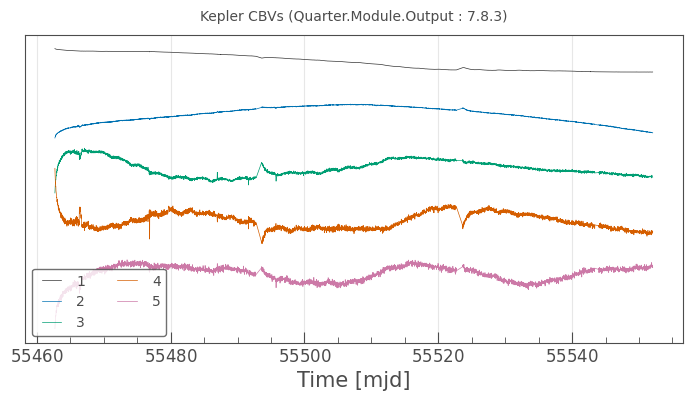

In [17]:
cbvs_aligned.plot(cbv_indices=np.arange(1,6));

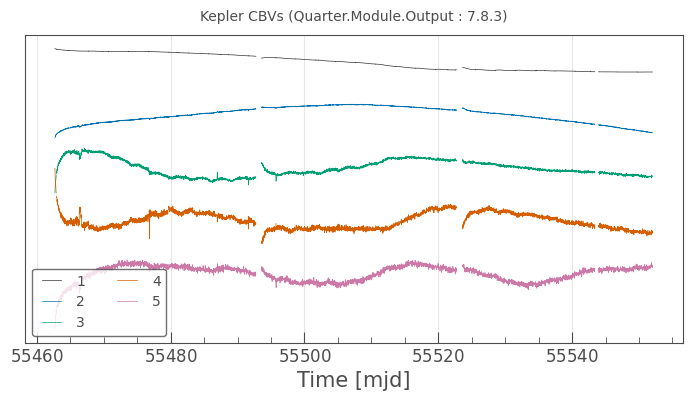

In [27]:
cbvs.plot(cbv_indices=np.arange(1,6));

In [18]:
from lightkurve.correctors import CBVCorrector

In [19]:
cbvCorrector = CBVCorrector(lc)

In [20]:
cbvCorrector.cbvs

[Kepler CBVs, Quarter.Module.Output : 7.8.3, nCBVs : 16]

In [21]:
cbvCorrector.cbvs[0].cbv_type

'SingleScale'

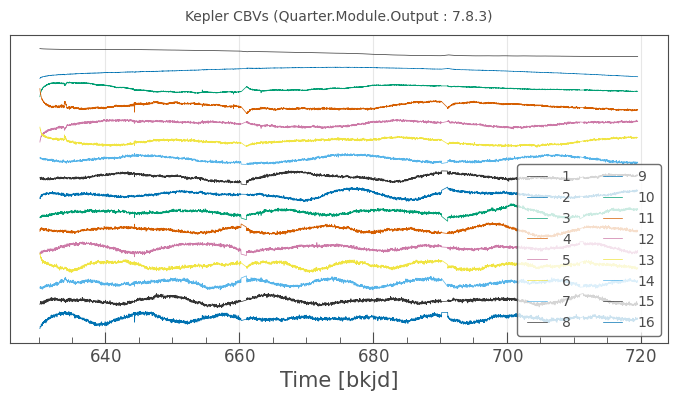

In [74]:
cbvCorrector.cbvs[0].plot();

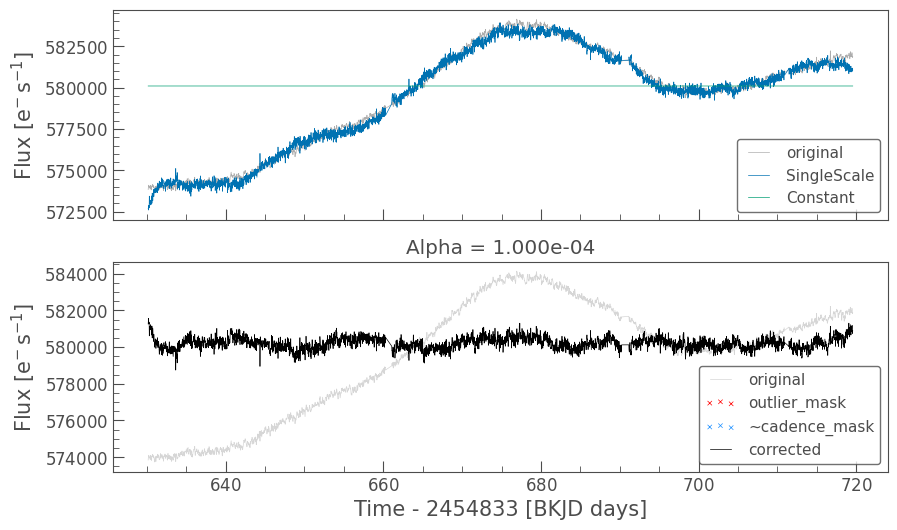

In [75]:
# Select which CBVs to use in the correction
cbv_type = ['SingleScale']#, 'Spike']
# Select which CBV indices to use
# Use the first 8 SingleScale and all Spike CBVS
cbv_indices = [np.arange(1,4)]#, 'ALL']
# Perform the correction

cbvCorrector.correct_gaussian_prior(cbv_type=['SingleScale'], cbv_indices=[np.arange(1,9)], alpha=1e-4)
cbvCorrector.diagnose();

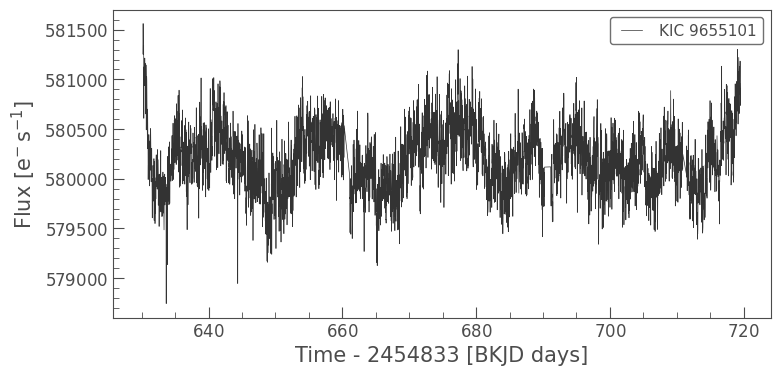

In [76]:
new_lc = cbvCorrector.corrected_lc
new_lc.plot();

In [25]:
# Note: this cell will be slow to run
print('Over fitting Metric: {}'.format(cbvCorrector.over_fitting_metric()))
print('Under fitting Metric: {}'.format(cbvCorrector.under_fitting_metric()))

Over fitting Metric: 0.003420826311411896
Under fitting Metric: 0.9992679925881398


In [286]:
# cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);

/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: Ru

Optimized Over-fitting metric: 0.4868121590233162
Optimized Under-fitting metric: 0.3222950982835031
Optimized Alpha: 4.435e+00


/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: Ru

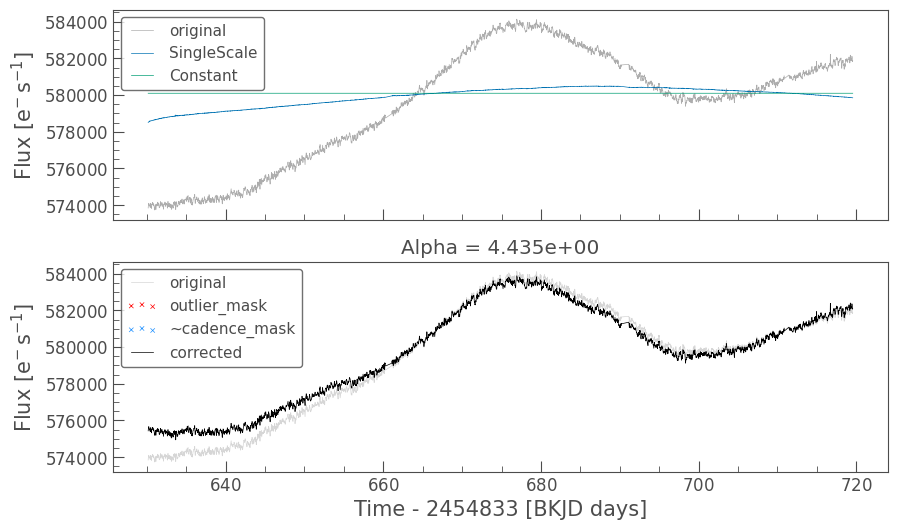

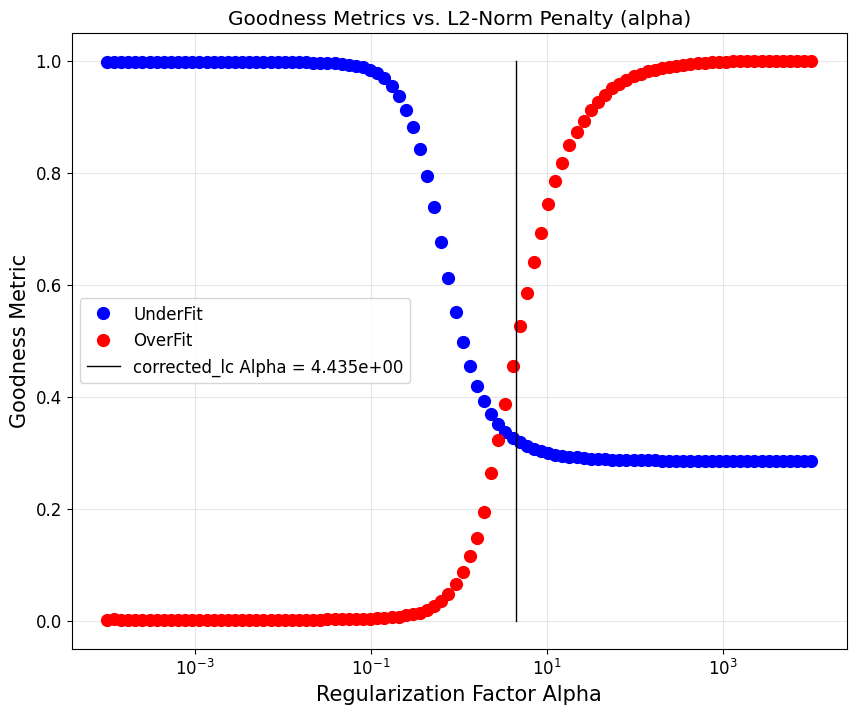

In [26]:
cbvCorrector.correct(cbv_type=cbv_type, cbv_indices=cbv_indices);
cbvCorrector.diagnose();
cbvCorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices);

# Using the CBVs with other things

In [132]:
from lightkurve.correctors import DesignMatrix

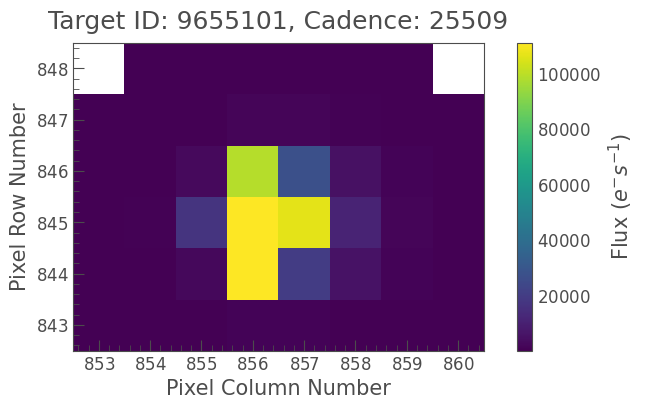

In [77]:
tpf = lk.search_targetpixelfile('KIC 9655101', exptime=1800, mission='Kepler', quarter=7).download()
tpf.plot();

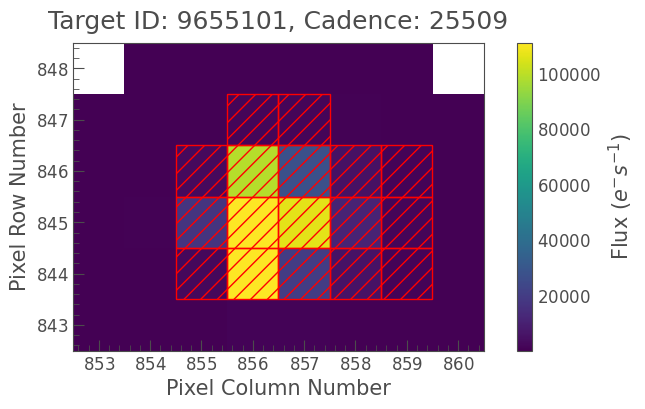

In [78]:
# Lets check what Kepler is using as the aperture
tpf.plot(aperture_mask=tpf.pipeline_mask);

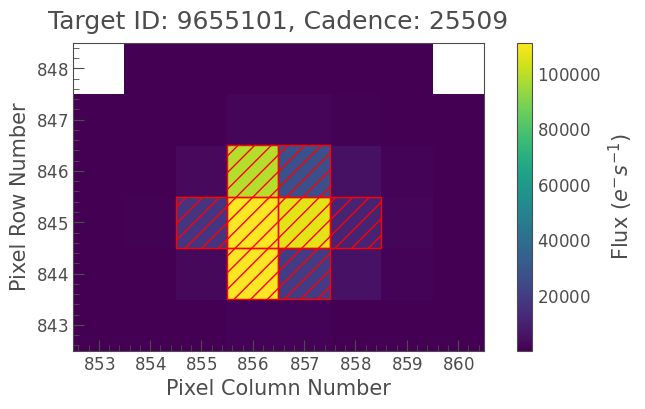

In [79]:
# Create a simple thresholded aperture mask
aper = tpf.create_threshold_mask(threshold=15, reference_pixel='center')
tpf.plot(aperture_mask=aper);

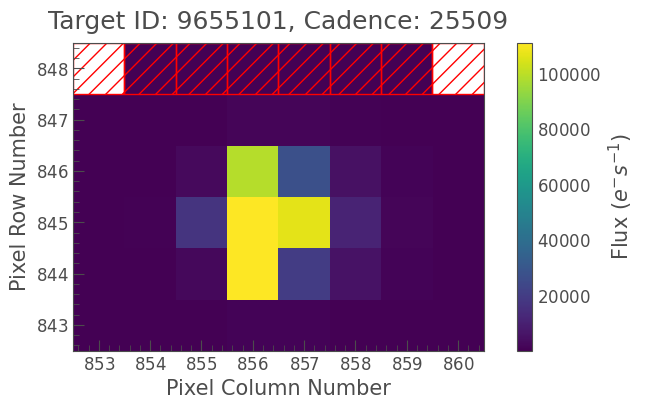

In [180]:
no_first_row_mask = np.asarray([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [True, True, True, True, True, True, True, True]])
tpf.plot(aperture_mask=no_first_row_mask);

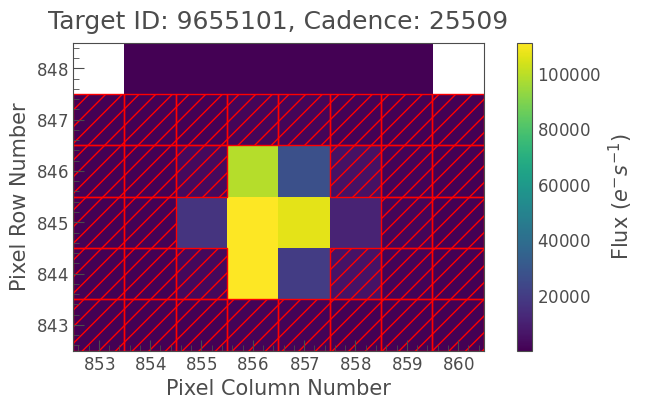

In [181]:
tpf.plot(aperture_mask=~aper&~no_first_row_mask);

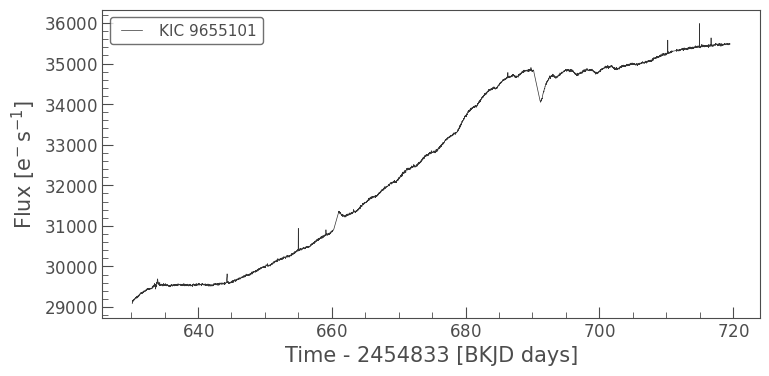

In [204]:
# Generate a simple aperture photometry light curve of the background
raw_bg = tpf.to_lightcurve(aperture_mask=~aper&~no_first_row_mask)
raw_bg.plot();

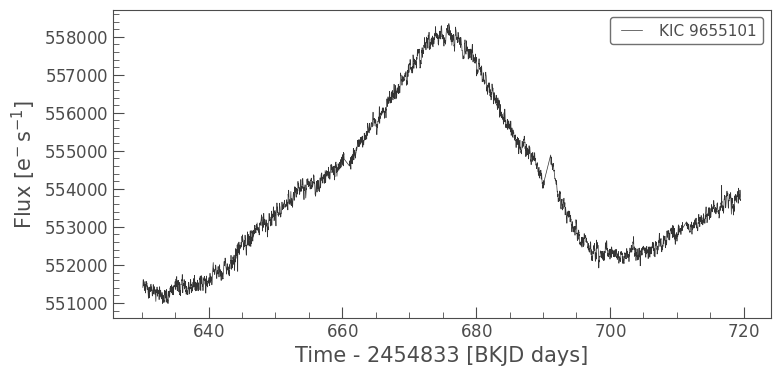

In [80]:
# Generate a simple aperture photometry light curve
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
raw_lc.plot();

In [81]:
freq,amp = calc_lomb_scargle(raw_lc.time.value,raw_lc.flux.value)

/var/folders/5_/9nz8zb3j1nd7ngnmb4btgpjh0000gq/T/ipykernel_15187/662215330.py:14: RuntimeWarning: invalid value encountered in sqrt
  amp = np.sqrt(sc) * fct


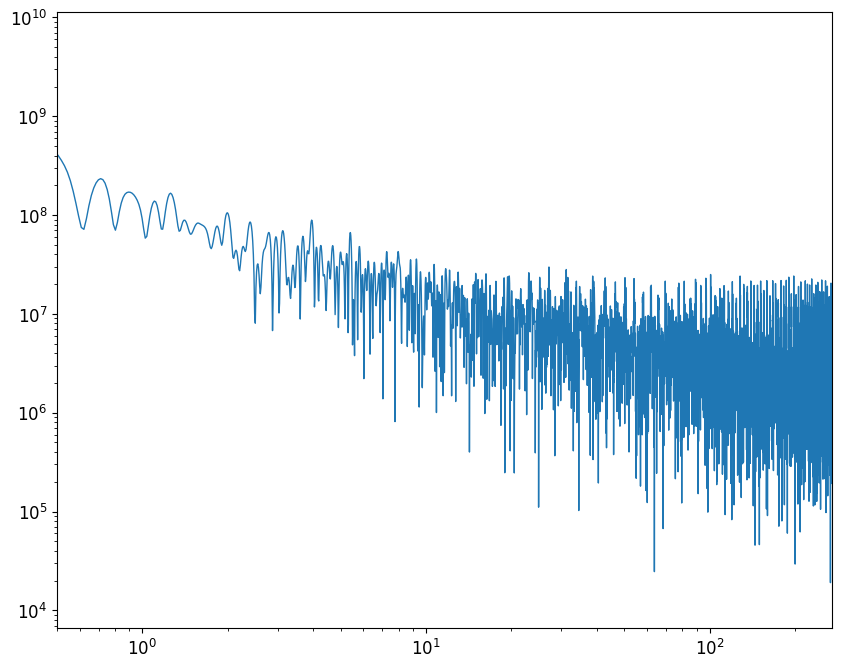

In [85]:
plt.plot(freq,amp)
plt.xlim(0.5,270)
plt.xscale('log')
plt.yscale('log')
plt.show()

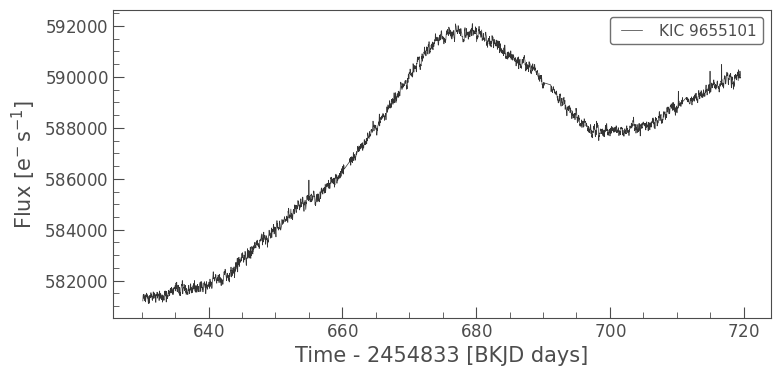

In [90]:
# Generate a simple aperture photometry light curve
raw_lc_all = tpf.to_lightcurve(aperture_mask=aper|~aper)
raw_lc_all.plot();

In [91]:
freq1,amp1 = calc_lomb_scargle(raw_lc_all.time.value,raw_lc_all.flux.value)

/var/folders/5_/9nz8zb3j1nd7ngnmb4btgpjh0000gq/T/ipykernel_15187/662215330.py:14: RuntimeWarning: invalid value encountered in sqrt
  amp = np.sqrt(sc) * fct


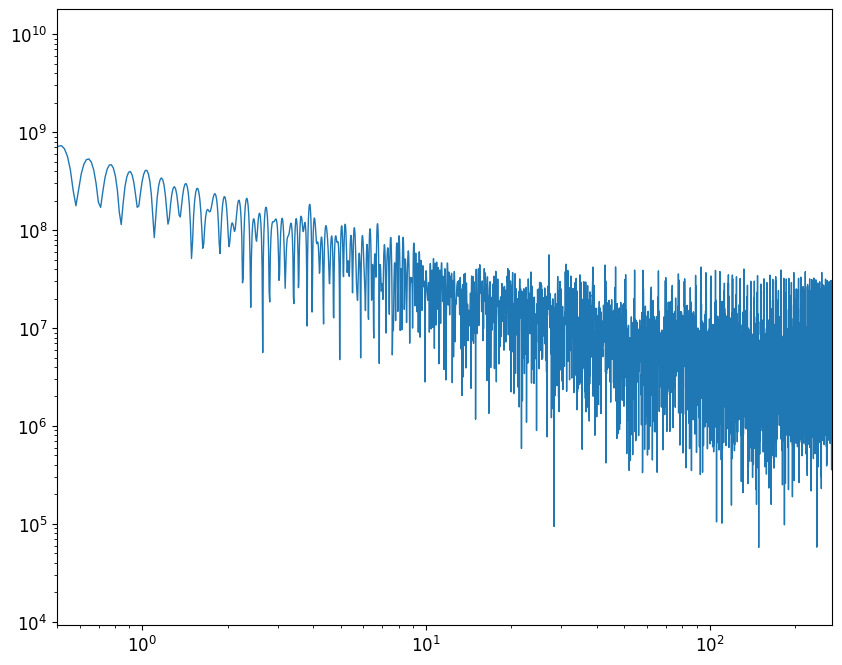

In [92]:
plt.plot(freq1,amp1)
plt.xlim(0.5,270)
plt.xscale('log')
plt.yscale('log')
plt.show()

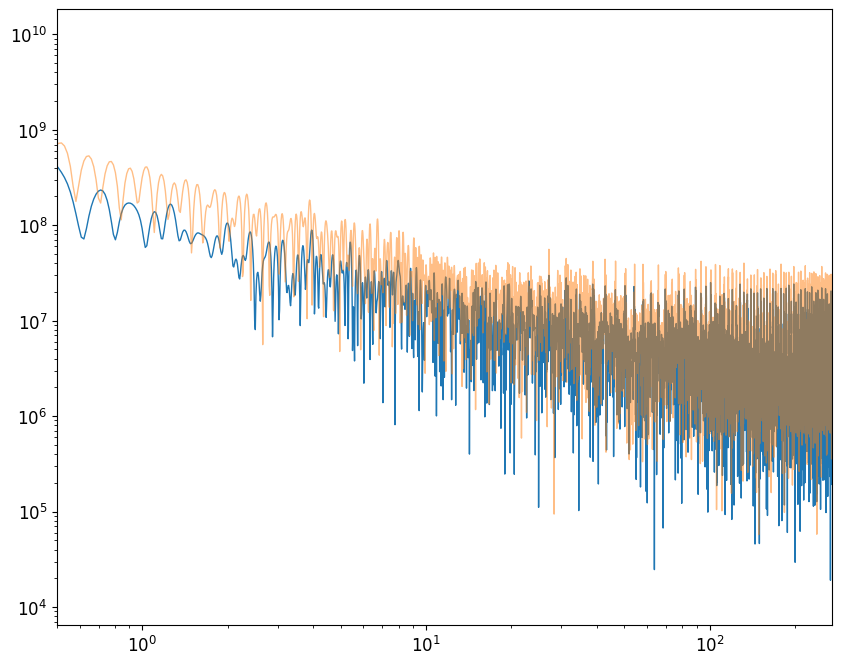

In [94]:
plt.plot(freq,amp)
plt.plot(freq1,amp1,alpha=0.5)
plt.xlim(0.5,270)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [182]:
# Create a design matrix using PCA components from the cutout background
dm = DesignMatrix(tpf.flux[:, ~aper&~no_first_row_mask], name='pixel regressors').pca(5).append_constant()

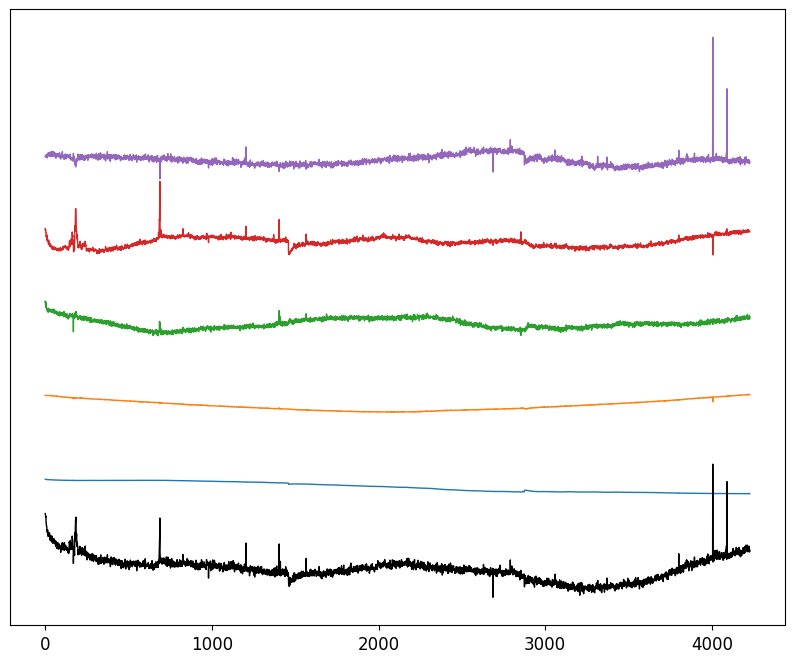

In [226]:
plt.plot(dm[0])
plt.plot(dm[1]+1/4)
plt.plot(dm[2]+2/4)
plt.plot(dm[3]+3/4)
plt.plot(dm[4]+4/4)
plt.plot(dm[0]+dm[1]+dm[2]+dm[3]+dm[4]-1/4,color='k')
# plt.plot(np.sum(dm[0:5]))
plt.yticks([])
plt.show()

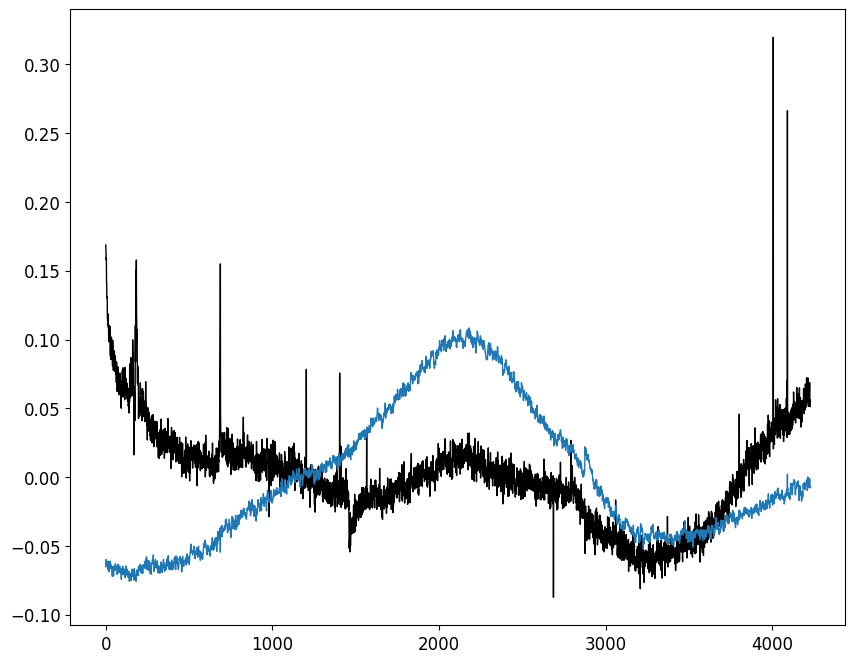

In [239]:
plt.plot(dm[0]+dm[1]+dm[2]+dm[3]+dm[4],color='k')
plt.plot((raw_lc.flux-np.mean(raw_lc.flux))/40000)
plt.show()

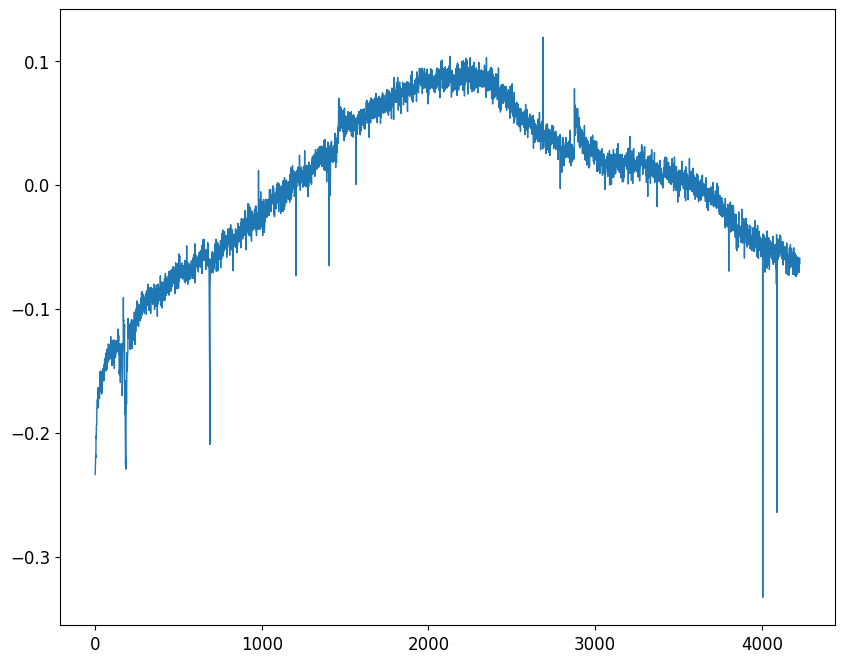

In [243]:
plt.plot(((raw_lc.flux.value-np.mean(raw_lc.flux.value))/40000)-(dm[0]+dm[1]+dm[2]+dm[3]+dm[4]))

Extrapolation of CBVs appears to be necessary. Extrapolated values will be filled with zeros. Recommend setting extrapolate=True
Some interpolated (or extrapolated) CBV values have been set to zero
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Over-fitting metric: 9.461789488461356e-07
CDPP: 123.95222520361756 ppm


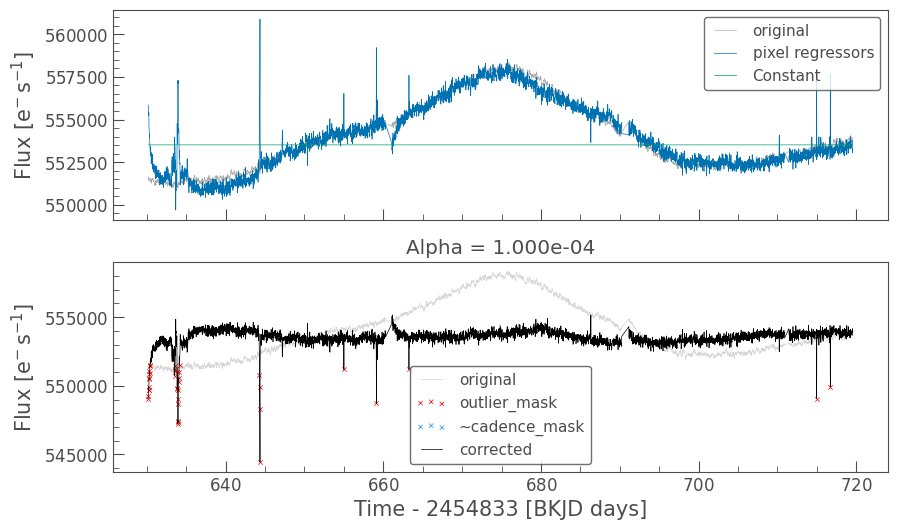

In [185]:
# Generate the CBVCorrector object and interpolate the downloaded CBVs to the light curve cadence
cbvcorrector = CBVCorrector(raw_lc)#, interpolate_cbvs=True)
# Perform an unrestricted least-squares fit using only the pixel-derived design matrix.
cbvcorrector.correct_gaussian_prior(cbv_type=None, cbv_indices=None, ext_dm=dm, alpha=1e-4)
cbvcorrector.diagnose()
print('Over-fitting metric: {}'.format(cbvcorrector.over_fitting_metric()))
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
corrected_lc_just_pixel_dm = cbvcorrector.corrected_lc

/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Over-fitting metric: 9.46353190276411e-06
CDPP: 125.21899108301807 ppm


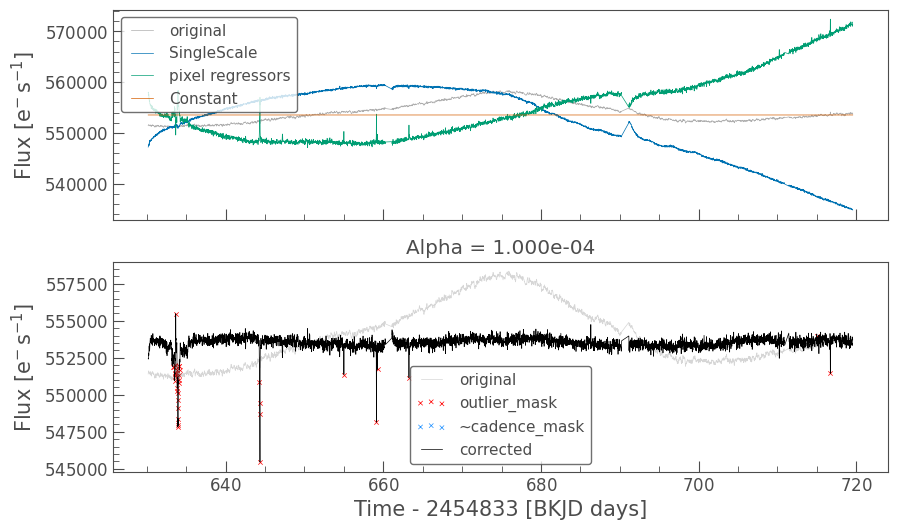

In [201]:
# Select which CBVs to use in the correction
cbv_type = ['SingleScale']#, 'Spike']
# Select which CBV indices to use
cbv_indices = [np.arange(1,4)]#, 'ALL']
# Generate the CBVCorrector object and interpolate the downloaded CBVs to the light curve cadence
cbvcorrector = CBVCorrector(raw_lc)#, interpolate_cbvs=True)
# Perform an unrestricted least-squares fit using only the pixel-derived design matrix.
cbvcorrector.correct_gaussian_prior(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm, alpha=1e-4)
cbvcorrector.diagnose()
print('Over-fitting metric: {}'.format(cbvcorrector.over_fitting_metric()))
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
corrected_lc_just_pixel_dm = cbvcorrector.corrected_lc

/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: Ru

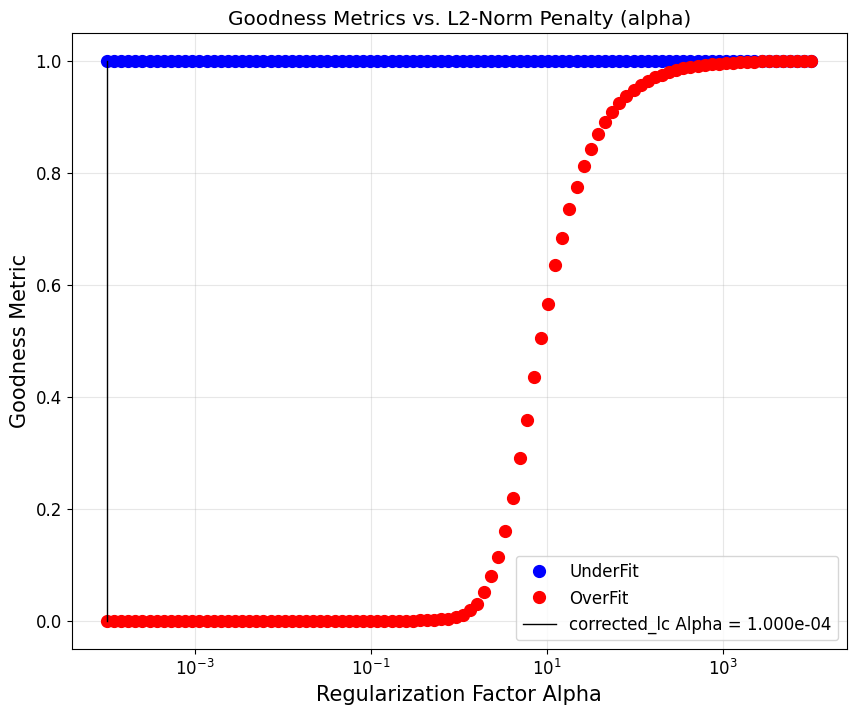

In [202]:
cbvcorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm);

/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Optimized Over-fitting metric: 0.9996488557442157
Optimized Under-fitting metric: 1.0
Optimized Alpha: 9.877e+03
CDPP: 107.30059867654388 ppm


/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/ccra8514/anaconda3/envs/notebook_lk/lib/python3.9/site-packages/astropy/units/quantity.py:673: Ru

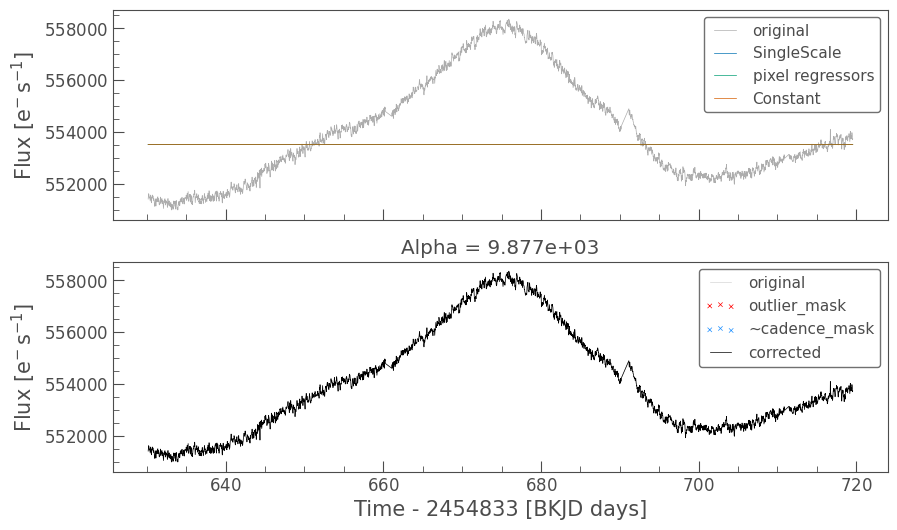

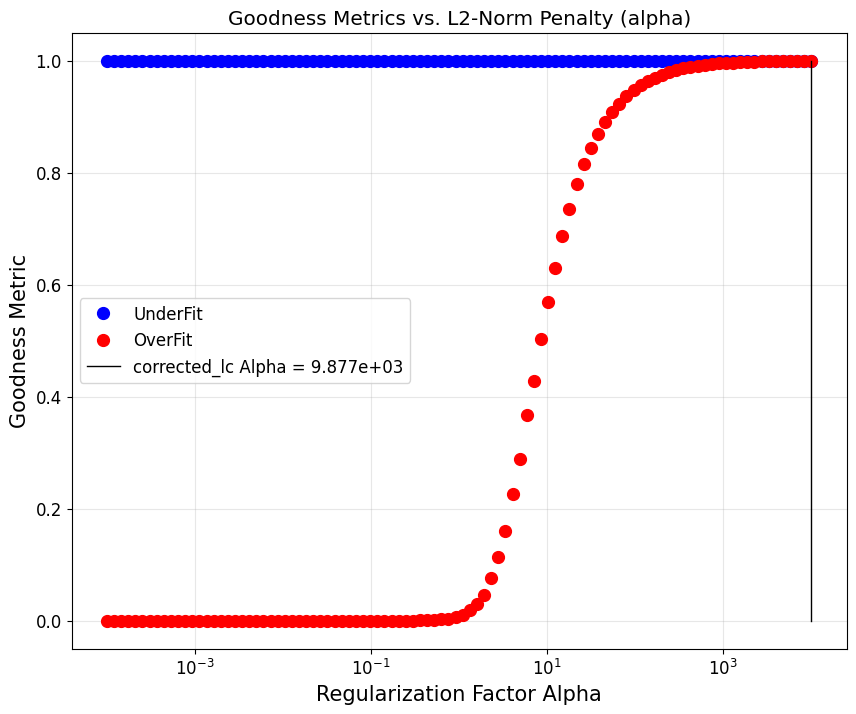

In [203]:
# Optimize the fit but ignore the under-fitting metric and set bounds on the alpha parameter.
cbvcorrector.correct(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm)#, 
#                      alpha_bounds=[1e-4, 10**(-0.5)], target_over_score=0.2, target_under_score=-1)
cbvcorrector.diagnose();
print('CDPP: {}'.format(cbvcorrector.corrected_lc.estimate_cdpp()))
cbvcorrector.goodness_metric_scan_plot(cbv_type=cbv_type, cbv_indices=cbv_indices, ext_dm=dm);

# How does this fit in with the original lightcurve

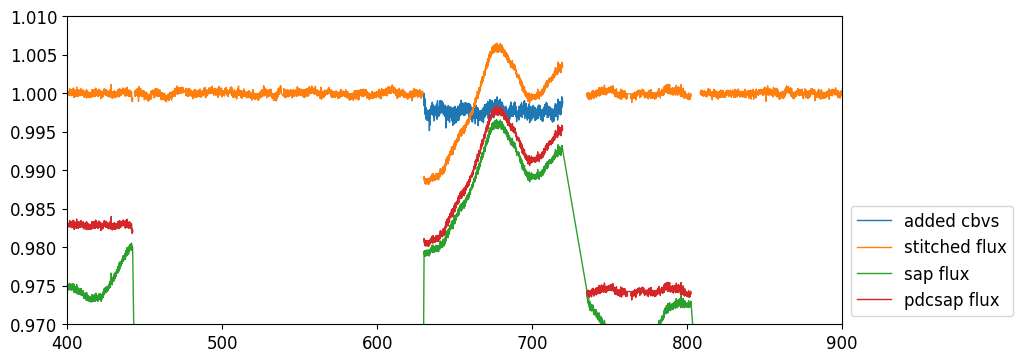

In [293]:
plt.figure(figsize=(10,4))
plt.plot(new_lc.time.value,new_lc.flux.value/np.max(new_lc.flux.value),label='added cbvs')

plt.plot(lc_echelle.time.value,lc_echelle.flux.value,label='stitched flux')
plt.plot(lc_echelle.time.value,lc_echelle.sap_flux/np.max(lc_echelle.sap_flux),label='sap flux')
plt.plot(lc_echelle.time.value,lc_echelle.pdcsap_flux/np.max(lc_echelle.pdcsap_flux),label='pdcsap flux')
# plt.savefig('/Users/ccra8514/Desktop/pdc_sap_comparison')
# plt.xlim(600,750)
plt.xlim(400,900)
plt.ylim(bottom=0.97)
# plt.ylim(bottom=0.99)
plt.legend(loc='lower left',bbox_to_anchor=(1,0))
# plt.savefig('/Users/ccra8514/Desktop/CBVcorrection',bbox_inches='tight')
plt.show()